# <font style="color:rgb(50,120,229)">Objective </font>
You have seen how we convert from one color space to another and also the theory behind the color spaces. In this assignment, you will implement the function cvtColor using the conversion formulae given in the opencv website. Specifically, you will be implementing the 2 functions:
1. convertBGRtoGray ( 10 points )
1. convertBGRtoHSV ( 20 points )

We have created the outline of the functions along with the supporting code. You just have to implement the formula in the function.

**Parameters**

**Input**
- BGR image ( named img )

**Output**
- Gray or HSV image

In [1]:
// Include libraries
#include <iostream>
#include "includeLibraries.h"

In [2]:
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <opencv2/imgproc.hpp>

In [3]:
#include "matplotlibcpp.h"
#include "displayImages.h"

In [4]:
using namespace std;

In [5]:
using namespace cv;

In [6]:
using namespace matplotlibcpp;

In [7]:
Mat img = imread(DATA_PATH + "images/sample.jpg");

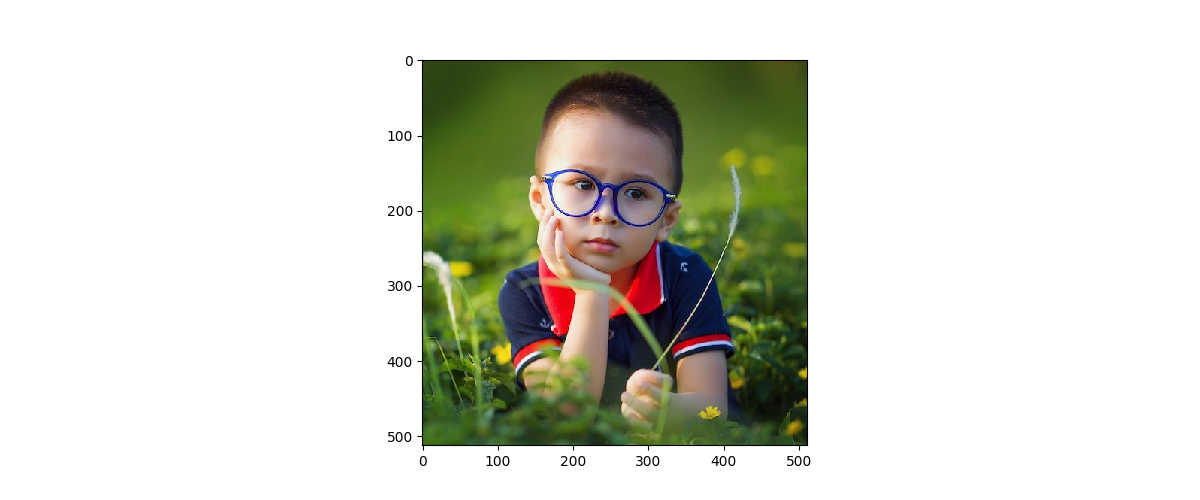

In [8]:
plt::figure_size(1200,500);
plt::imshow(img);
auto pltImg = displayImage(img);
pltImg

#### <font style="color:rgb(50,120,229)">Convert BGR image to Grayscale image</font>
- Input: image in BGR mode
- Output: image in grayscale mode

For your convenience, we have added the conversion formula below
![BGR to Gray formula](https://www.dropbox.com/s/2zuuigf5cpocs75/bgr2gray_formula.png?dl=1)

#### Reference: 
https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html


In [9]:
// Convert BGR image to Grayscale image
// Input: image in BGR mode
// Output: image in grayscale mode

// Reference: https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html
Mat convertBGRtoGray(Mat image){
    ///
    /// YOUR CODE HERE
    ///
    Mat convertedImage = Mat::zeros(Size(image.cols, image.rows), CV_32FC1);
    Mat tempImage = image.clone();
    tempImage.convertTo(tempImage, CV_32FC1, 1/255.0);
    Mat bgrChannels[3];
    split(tempImage, bgrChannels);
    for(int i=0; i<image.rows; i++) {
        for(int j=0; j<image.cols; j++) {
            convertedImage.at<float>(i,j) = 0.299 * bgrChannels[2].at<float>(i, j) + 0.587 * bgrChannels[1].at<float>(i, j) + 0.114 * bgrChannels[0].at<float>(i, j);
        }
    }
    
    convertedImage.convertTo(convertedImage, CV_8UC1, 255.0);
    return convertedImage;
}

In [10]:
Mat gray = convertBGRtoGray(img);

Get the result from OpenCV's `cvtColor` function to verify

In [11]:
Mat gray_cv;
cvtColor(img,gray_cv,COLOR_BGR2GRAY);

In [12]:
Mat diffGray;
absdiff(gray,gray_cv,diffGray);

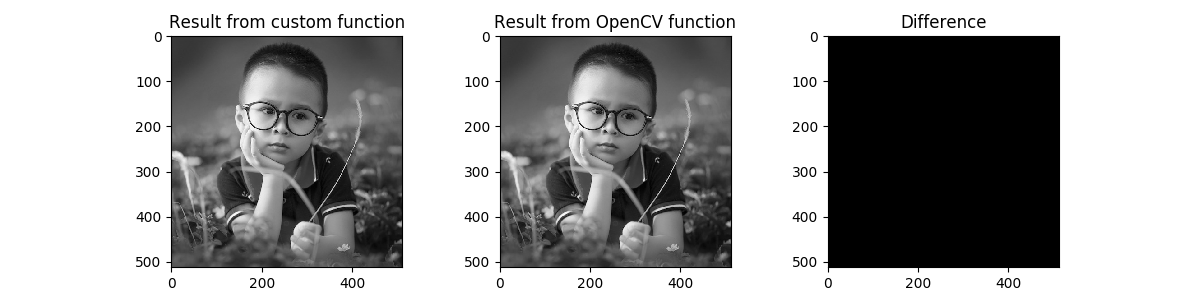

In [13]:
plt::figure_size(1200,300);
plt::subplot(1,3,1);
plt::title("Result from custom function");
plt::imshow(gray);
pltImg = displayImage(gray);
plt::subplot(1,3,2);
plt::title("Result from OpenCV function");
plt::imshow(gray_cv);
pltImg = displayImage(gray_cv);
plt::subplot(1,3,3);
plt::title("Difference");
plt::imshow(diffGray);
pltImg = displayImage(diffGray);
pltImg

In [14]:
///
/// AUTOGRADER TEST - DO NOT REMOVE
///


#### <font style="color:rgb(50,120,229)">Convert BGR image to HSV image</font>
- Input: image in BGR mode
- Output: image in HSV mode

For your convenience, we have added the conversion formula below
![BGR to HSV formula](https://www.dropbox.com/s/btdrk2qxd9knav1/bgr2hsv_formula.png?dl=1)

#### Reference: 
https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html

You can assume we are working with 8 bit images.

In [15]:
// Convert BGR image to HSV image
// Input: image in BGR mode
// Output: image in HSV mode

// Reference: https://docs.opencv.org/4.1.0/de/d25/imgproc_color_conversions.html

Mat convertBGRtoHSV(Mat image){
    ///
    /// YOUR CODE HERE
    ///
    Mat convertedImage = Mat::zeros(Size(image.cols, image.rows), CV_32FC3);
    Mat tempImage = image.clone();
    tempImage.convertTo(tempImage, CV_32FC3, 1/255.0);
    vector<Mat> bgrChannels(3);
    split(tempImage, bgrChannels);
    Mat H(image.rows, image.cols, CV_32F); 
    Mat S(image.rows, image.cols, CV_32F); 
    Mat V(image.rows, image.cols, CV_32F);
    for(int i=0; i<image.rows; i++) {
        for(int j=0; j<image.cols; j++) {
            
            float B = bgrChannels[0].at<float>(i,j);
            float G = bgrChannels[1].at<float>(i,j);
            float R = bgrChannels[2].at<float>(i,j);
            
            V.at<float>(i,j) = max(B, max(G, R));
            
            if (V.at<float>(i,j) != 0.0) {
                S.at<float>(i,j) = (V.at<float>(i,j) - min(B, min(G, R))) / V.at<float>(i,j);
            } else {
                S.at<float>(i,j) = 0.0;
            }
            
            if (V.at<float>(i,j) == R) {
                H.at<float>(i,j) = 60 * (G - B) / (V.at<float>(i,j) - min(B, min(G, R)));
            } else if (V.at<float>(i,j) == G) {
                H.at<float>(i,j) = 120 + 60 * (B - R) / (V.at<float>(i,j) - min(B, min(G, R)));
            } else if (V.at<float>(i,j) == B) {
                H.at<float>(i,j) = 240 + 60 * (R - G) / (V.at<float>(i,j) - min(B, min(G, R)));
            }
            
            if (H.at<float>(i,j) < 0) {
                H.at<float>(i,j) = H.at<float>(i,j) + 360;
            }
        }
    }
    
    V = V * 255.0;
    S = S * 255.0;
    H = H / 2.0;
    
    vector<Mat> hsvChannels(3);
    hsvChannels[0] = H;
    hsvChannels[1] = S;
    hsvChannels[2] = V;
    
    merge(hsvChannels, convertedImage);
    
    convertedImage.convertTo(hsvChannels, CV_8UC3, 1.0, 0.0);
    return convertedImage;
}

In [16]:
Mat hsv = convertBGRtoHSV(img);

Standard Exception: OpenCV(4.1.0) /home/vocuser/tmp/xeus/4.1.opencv/opencv/modules/core/src/matrix_wrap.cpp:1477: error: (-215:Assertion failed) d == 2 && (sizes[0] == 1 || sizes[1] == 1 || sizes[0]*sizes[1] == 0) in function 'create'


Get the result from OpenCV's `cvtColor` function to verify

In [ ]:
Mat hsv_cv;
cvtColor(img,hsv_cv,COLOR_BGR2HSV);

In [ ]:
Mat diffHSV;
absdiff(hsv,hsv_cv,diffHSV);

In [ ]:
plt::figure_size(1200,300);
plt::subplot(1,3,1);
plt::title("Result from custom function");
plt::imshow(hsv);
pltImg = displayImage(hsv);
plt::subplot(1,3,2);
plt::title("Result from OpenCV function");
plt::imshow(hsv_cv);
pltImg = displayImage(hsv_cv);
plt::subplot(1,3,3);
plt::title("Difference");
plt::imshow(diffHSV);
pltImg = displayImage(diffHSV);
pltImg

In [ ]:
///
/// AUTOGRADER TEST - DO NOT REMOVE
///
